# Exploratory Data Analysis for Hypoglycemia prediction prediction 

Data obtainded for this project is available on: https://data.mendeley.com/datasets/3hbcscwz44/1

Data is organized into CSV ﬁles for each patient. A 5-min interval has
been used for the records. In addition, we have a second dataset which basically provide us statistical information and interest measures for each patient 

Briefly, the following list explains some characteristics about the variables which contains the data and what means each of them:
<br>
- **time**: time of data recording (yyyy-MM-dd’T’HH:mm:ss format)
- **glucose**: blood glucose value (mg/dL)
- **calories**: calories burned in the time Interval
- **heart_rate**: heart frequency
- **steps**: steps taken in the time interval
- **basal_rate**: basal insulin infusions in the time interval
- **bolus_volume_delivered**: insulin bolus injections in the time interval
- **carb_input**: servings of carbohydrates ingested in the time interval (1 serving = 10 g)

For the second df the structure is the following :
- **ID**
- **Gender**
- **HbA1c** (glycosylated hemoglobin)
- **Age** [years]
- **DX time** [years] (years of illness)
- **Weight** [kg]
- **Height** [cm]
- **Treatment** (continuous subcutaneous insulin infusion or multiple dose insulin)

## Read the data 

In [1]:
import pandas as pd 
import os 

In [2]:
data_dir = '../Data/Preprocessed'
base_paths = os.listdir(data_dir)
full_paths = [os.path.join(data_dir, p) for p in base_paths]
full_paths

['../Data/Preprocessed/HUPA0004P.csv',
 '../Data/Preprocessed/HUPA0006P.csv',
 '../Data/Preprocessed/HUPA0007P.csv',
 '../Data/Preprocessed/HUPA0009P.csv',
 '../Data/Preprocessed/HUPA0005P.csv',
 '../Data/Preprocessed/HUPA0011P.csv',
 '../Data/Preprocessed/HUPA0003P.csv',
 '../Data/Preprocessed/HUPA0001P.csv',
 '../Data/Preprocessed/HUPA0010P.csv',
 '../Data/Preprocessed/HUPA0002P.csv',
 '../Data/Preprocessed/HUPA0014P.csv',
 '../Data/Preprocessed/HUPA0015P.csv',
 '../Data/Preprocessed/HUPA0016P.csv',
 '../Data/Preprocessed/HUPA0017P.csv',
 '../Data/Preprocessed/HUPA0018P.csv',
 '../Data/Preprocessed/HUPA0021P.csv',
 '../Data/Preprocessed/HUPA0020P.csv',
 '../Data/Preprocessed/HUPA0024P.csv',
 '../Data/Preprocessed/HUPA0019P.csv',
 '../Data/Preprocessed/HUPA0023P.csv',
 '../Data/Preprocessed/HUPA0022P.csv',
 '../Data/Preprocessed/HUPA0025P.csv',
 '../Data/Preprocessed/HUPA0028P.csv',
 '../Data/Preprocessed/HUPA0026P.csv',
 '../Data/Preprocessed/HUPA0027P.csv']

Now we store a dictionary which is conformed as follows: HUPA00iP : pandas_df, in order to load all our patients 

In [3]:
def cast_to_time(df):
    df['time'] = pd.to_datetime(df['time'])
    return df

In [4]:
patients = {base_paths[i].split('.')[0] : cast_to_time(pd.read_csv(fp, sep=';')) for i, fp in enumerate(full_paths)}

We read our second dataset which contains interest measures 

In [5]:
measures_patients = pd.read_csv('../Data/measures_patients.csv')

## Take a quick look 

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt

### General measures patients 

We begin by checking and visualizing general statistics  

In [7]:
measures_patients.head(3)

,ID,Gender,HbA1c [%],Age [years],DX time [years],Weight [kg],Height [cm],Treatment
0,HUPA0001P,Female,8.2,56.3,15.5,59.0,161,CSII
1,HUPA0002P,Male,7.1,48.6,36.5,82.4,186,CSII
2,HUPA0003P,Male,7.3,43.4,12.5,62.0,182,CSII


In [8]:
measures_patients.describe()

,HbA1c [%],Age [years],DX time [years],Weight [kg],Height [cm]
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,7.368000,39.240000,17.816000,69.068000,169.040000
std,0.832026,12.081873,10.711041,14.420839,10.628107
min,6.000000,18.000000,0.800000,51.000000,153.000000
25%,6.900000,29.900000,11.200000,58.500000,161.000000
50%,7.200000,41.200000,15.200000,64.000000,167.000000
75%,7.800000,47.900000,24.200000,77.600000,179.000000
max,9.700000,61.800000,39.500000,104.800000,188.000000


In [9]:
numerical_columns_measures = measures_patients.select_dtypes(include='number').columns
cat_columns_measures = [c for c in measures_patients.columns if c not in numerical_columns_measures]

In [10]:
def visualize_numerical_data(df, numerical_columns):
    _, axes = plt.subplots(nrows=5, figsize=(6,7))
    for i, column in enumerate(numerical_columns[:5]):
        ax_1 = axes[i]
        sns.boxplot(x=df[column], ax=ax_1, orient='h')
        ax_1.set(title=f'{column}')
    plt.tight_layout()

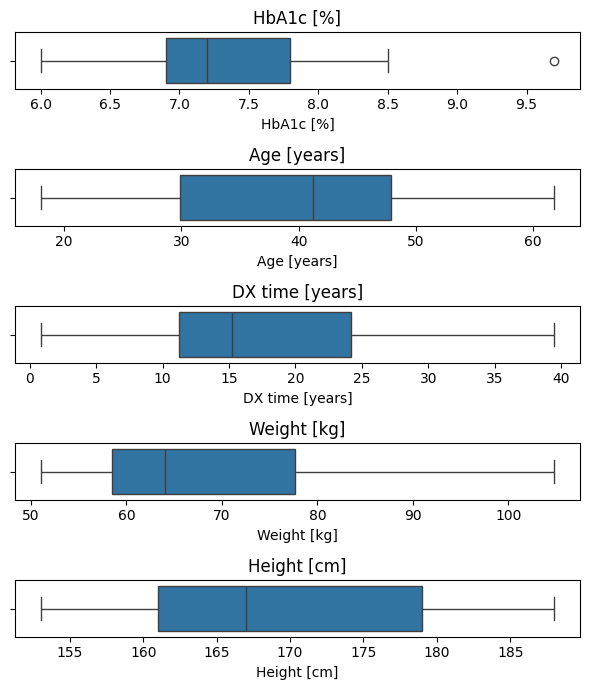

In [11]:
visualize_numerical_data(measures_patients, numerical_columns_measures)

In [12]:
def visualize_cat_data(df, cat_columns):
    _, axes = plt.subplots(ncols=2, figsize=(7, 5))
    columns_no_id = [c for c in cat_columns if c != 'ID']
    for i, column in enumerate(columns_no_id):
        ax = axes[i]
        df[column].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
        ax.set(title=f'{column}')
        ax.set_ylabel('')
    plt.tight_layout()

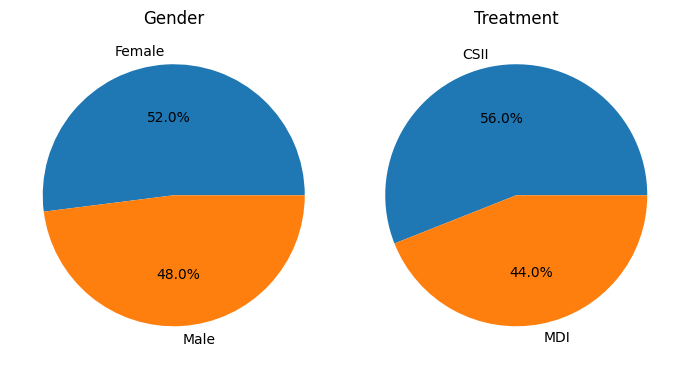

In [13]:
visualize_cat_data(measures_patients, cat_columns_measures)

### Statistics patients

In [45]:
from tabulate import tabulate

Now for our each patient, we take a quick look

In [14]:
ids = list(patients.keys())

In [15]:
for id in ids:
    print(id)
    display(patients[id].describe())

HUPA0004P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3184,3184.000000,3184.000000,3184.000000,3184.000000,3184.000000,3184.000000,3184.000000
mean,2018-07-15 04:07:30,180.377984,10.710174,78.138290,30.704460,0.073126,0.149215,0.634422
min,2018-07-09 15:30:00,40.000000,6.275500,59.880734,0.000000,0.000000,0.000000,0.000000
25%,2018-07-12 09:48:45,119.000000,6.275500,72.962068,0.000000,0.050000,0.000000,0.000000
50%,2018-07-15 04:07:30,171.666667,8.032640,76.464925,0.000000,0.075000,0.000000,0.000000
75%,2018-07-17 22:26:15,244.083333,12.927530,82.267857,32.000000,0.091667,0.000000,0.000000
max,2018-07-20 16:45:00,411.000000,45.936660,149.562500,599.000000,0.112500,19.800000,130.000000
std,NaN,83.020747,6.066717,9.194772,66.404294,0.024508,1.409133,8.051017


HUPA0006P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2018-07-13 15:07:30,165.204585,9.844447,65.619278,34.008297,0.075411,0.099039,0.097817
min,2018-07-09 15:45:00,42.000000,5.793500,41.423423,0.000000,0.000000,0.000000,0.000000
25%,2018-07-11 15:26:15,96.000000,5.793500,56.225838,0.000000,0.070417,0.000000,0.000000
50%,2018-07-13 15:07:30,146.000000,6.488720,62.965289,0.000000,0.075000,0.000000,0.000000
75%,2018-07-15 14:48:45,219.583333,10.544170,71.688546,18.000000,0.091667,0.000000,0.000000
max,2018-07-17 14:30:00,438.000000,61.874579,157.697674,626.000000,0.108333,10.800000,10.000000
std,NaN,84.736079,7.172734,14.345994,83.938115,0.018310,0.797489,0.813170


HUPA0007P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3857,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000,3857.000000
mean,2018-09-26 07:05:00,173.151991,13.918396,70.176904,46.025927,0.080526,0.122167,0.071429
min,2018-09-19 14:25:00,40.000000,6.929500,43.925926,0.000000,0.000000,0.000000,0.000000
25%,2018-09-22 22:45:00,107.000000,6.929500,60.083333,0.000000,0.070833,0.000000,0.000000
50%,2018-09-26 07:05:00,170.333333,8.869760,67.484848,0.000000,0.083333,0.000000,0.000000
75%,2018-09-29 15:25:00,232.666667,16.492210,77.416667,41.000000,0.100000,0.000000,0.000000
max,2018-10-02 23:45:00,385.000000,78.857711,149.387097,560.000000,0.108333,13.300000,8.500000
std,NaN,78.656646,10.715872,14.502353,96.437120,0.025893,0.940564,0.567893


HUPA0009P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3812,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000
mean,2018-09-26 05:22:29.999999744,193.739271,8.210463,84.621324,47.352308,0.089141,0.033709,0.013248
min,2018-09-19 14:35:00,100.000000,4.576000,61.875000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-22 21:58:45,158.138116,4.576000,76.612455,0.000000,0.075000,0.000000,0.000000
50%,2018-09-26 05:22:30,192.000000,5.216640,83.202941,0.000000,0.087500,0.000000,0.000000
75%,2018-09-29 12:46:15,230.238294,10.616320,91.877727,53.000000,0.095833,0.000000,0.000000
max,2018-10-02 20:10:00,307.000000,36.333440,128.227273,682.000000,0.112500,5.800000,2.000000
std,NaN,46.109890,5.242991,11.154577,96.873169,0.016983,0.296272,0.133658


HUPA0005P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3858,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000,3858.000000
mean,2018-07-16 07:02:29.999999744,147.698624,5.554286,84.490902,13.479264,0.066450,0.026102,0.022939
min,2018-07-09 14:20:00,40.000000,4.263500,32.407773,0.000000,0.000000,0.000000,0.000000
25%,2018-07-12 22:41:15,109.333333,4.263500,79.875242,0.000000,0.062500,0.000000,0.000000
50%,2018-07-16 07:02:30,144.000000,4.263500,85.563429,0.000000,0.070833,0.000000,0.000000
75%,2018-07-19 15:23:45,180.666667,5.286740,91.532109,0.000000,0.075000,0.000000,0.000000
max,2018-07-22 23:45:00,379.000000,28.139100,124.175819,597.000000,0.083333,4.200000,4.000000
std,NaN,49.791133,2.926070,10.991375,46.315006,0.014355,0.221013,0.209460


HUPA0011P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3839,3839.000000,3839.000000,3839.000000,3839.000000,3839.0,3839.0,3839.000000
mean,2018-11-14 07:49:59.999999744,159.108579,8.191564,73.849623,54.583746,0.0,0.0,0.293045
min,2018-11-07 15:55:00,53.000000,4.157500,48.962963,0.000000,0.0,0.0,0.000000
25%,2018-11-10 23:52:30,115.833333,4.157500,61.156863,0.000000,0.0,0.0,0.000000
50%,2018-11-14 07:50:00,154.000000,5.986800,73.600000,0.000000,0.0,0.0,0.000000
75%,2018-11-17 15:47:30,194.666667,11.308400,83.025344,80.000000,0.0,0.0,0.000000
max,2018-11-20 23:45:00,355.000000,41.741300,163.785714,627.000000,0.0,0.0,60.000000
std,NaN,57.085512,4.895221,14.591668,93.040868,0.0,0.0,2.960805


HUPA0003P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3770,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,2018-06-20 10:42:29.999999744,143.273519,9.317933,78.073311,27.411141,0.054491,0.071280,0.115119
min,2018-06-13 21:40:00,44.000000,5.383000,51.177801,0.000000,0.000000,0.000000,0.000000
25%,2018-06-17 04:11:15,95.375000,5.487000,69.506944,0.000000,0.029167,0.000000,0.000000
50%,2018-06-20 10:42:30,129.000000,6.913620,77.186508,0.000000,0.066667,0.000000,0.000000
75%,2018-06-23 17:13:45,181.000000,11.412960,86.220221,26.000000,0.075000,0.000000,0.000000
max,2018-06-26 23:45:00,366.000000,46.968720,148.897436,595.000000,0.125000,9.100000,13.000000
std,NaN,61.326542,5.335985,12.723682,61.259533,0.024162,0.533412,0.986448


HUPA0001P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,4096,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000
mean,2018-06-20 21:17:30,181.443726,5.920327,80.827004,19.467529,0.049675,0.038477,0.029541
min,2018-06-13 18:40:00,40.000000,4.025000,53.462278,0.000000,0.000000,0.000000,0.000000
25%,2018-06-17 07:58:45,131.000000,4.025000,69.755759,0.000000,0.037500,0.000000,0.000000
50%,2018-06-20 21:17:30,165.666667,4.186000,81.007930,0.000000,0.041667,0.000000,0.000000
75%,2018-06-24 10:36:15,222.000000,6.440000,89.834402,8.000000,0.070833,0.000000,0.000000
max,2018-06-27 23:55:00,444.000000,37.513000,167.322581,621.000000,0.091667,5.200000,4.000000
std,NaN,70.644633,3.460342,12.929865,57.332804,0.022216,0.344373,0.310549


HUPA0010P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,2018-11-12 19:32:30,135.892648,7.222873,78.239923,44.621304,0.059467,0.031863,0.035534
min,2018-11-07 15:35:00,41.000000,4.068500,53.475000,0.000000,0.000000,0.000000,0.000000
25%,2018-11-10 05:33:45,95.519650,4.068500,73.844239,0.000000,0.037500,0.000000,0.000000
50%,2018-11-12 19:32:30,126.000000,5.370420,79.119420,0.000000,0.062500,0.000000,0.000000
75%,2018-11-15 09:31:15,162.666667,9.438920,80.613017,61.000000,0.066667,0.000000,0.000000
max,2018-11-17 23:30:00,416.000000,29.211831,166.331633,593.000000,0.150000,4.000000,6.000000
std,NaN,57.606632,4.097836,10.578224,80.123573,0.025213,0.246827,0.340072


HUPA0002P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2018-06-19 11:15:00,113.469664,10.187371,66.703536,39.242377,0.088362,0.073153,0.199937
min,2018-06-13 22:45:00,40.000000,6.092000,39.384066,0.000000,0.000000,0.000000,0.000000
25%,2018-06-16 17:00:00,71.000000,6.092000,57.937500,0.000000,0.066667,0.000000,0.000000
50%,2018-06-19 11:15:00,98.666667,6.579360,64.432432,0.000000,0.079167,0.000000,0.000000
75%,2018-06-22 05:30:00,139.000000,11.209280,72.417323,27.000000,0.112500,0.000000,0.000000
max,2018-06-24 23:45:00,310.000000,46.542880,118.083333,597.000000,0.141667,10.000000,103.000000
std,NaN,59.145068,7.083393,11.951790,92.618529,0.026467,0.665905,3.786804


HUPA0014P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3829,3829.000000,3829.000000,3829.000000,3829.000000,3829.0,3829.000000,3829.000000
mean,2018-11-14 08:15:00.000000512,188.061765,7.307729,82.680702,35.654740,0.0,0.071037,0.047140
min,2018-11-07 16:45:00,40.000000,4.493500,53.512195,0.000000,0.0,0.000000,0.000000
25%,2018-11-11 00:30:00,134.333333,4.493500,71.033333,0.000000,0.0,0.000000,0.000000
50%,2018-11-14 08:15:00,184.000000,4.583370,81.303571,0.000000,0.0,0.000000,0.000000
75%,2018-11-17 16:00:00,242.000000,7.998430,92.156250,13.000000,0.0,0.000000,0.000000
max,2018-11-20 23:45:00,443.500000,43.317340,168.562500,609.000000,0.0,11.000000,6.500000
std,NaN,72.458599,4.966698,14.283335,94.562878,0.0,0.707970,0.470732


HUPA0015P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3792,3792.000000,3792.000000,3792.000000,3792.000000,3792.0,3792.0,3792.0
mean,2019-04-03 06:12:30,163.518724,7.605926,68.485467,47.731276,0.0,0.0,0.0
min,2019-03-27 16:15:00,40.000000,4.234000,49.431034,0.000000,0.0,0.0,0.0
25%,2019-03-30 23:13:45,109.666667,4.234000,58.584117,0.000000,0.0,0.0,0.0
50%,2019-04-03 06:12:30,150.333333,4.572720,64.467213,0.000000,0.0,0.0,0.0
75%,2019-04-06 13:11:15,215.000000,9.060760,73.204242,45.000000,0.0,0.0,0.0
max,2019-04-09 20:10:00,370.000000,52.162880,174.714286,658.000000,0.0,0.0,0.0
std,NaN,68.044106,5.619100,14.714136,104.191408,0.0,0.0,0.0


HUPA0016P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3835,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,2019-04-03 08:00:00,150.208344,8.599286,89.830006,43.735332,0.068306,0.071890,0.085984
min,2019-03-27 16:15:00,40.000000,4.656000,57.834646,0.000000,0.000000,0.000000,0.000000
25%,2019-03-31 00:07:30,85.000000,4.656000,75.432107,0.000000,0.066667,0.000000,0.000000
50%,2019-04-03 08:00:00,127.333333,5.773440,92.264463,0.000000,0.073333,0.000000,0.000000
75%,2019-04-06 15:52:30,206.595238,11.174400,102.300952,42.000000,0.073333,0.000000,0.000000
max,2019-04-09 23:45:00,362.000000,34.826880,135.268156,617.000000,0.110000,8.600000,8.000000
std,NaN,79.837161,5.491796,15.691050,94.654480,0.022617,0.575982,0.670560


HUPA0017P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3599,3599.000000,3599.000000,3599.000000,3599.000000,3.599000e+03,3599.000000,3599.000000
mean,2019-04-03 17:55:00.000000256,200.795244,7.696102,82.103860,27.504585,5.900000e-02,0.018616,0.047235
min,2019-03-28 12:00:00,40.000000,4.771500,49.250000,0.000000,5.900000e-02,-3.000000,0.000000
25%,2019-03-31 14:57:30,149.000000,4.771500,67.924953,0.000000,5.900000e-02,0.000000,0.000000
50%,2019-04-03 17:55:00,207.000000,4.962360,82.775246,0.000000,5.900000e-02,0.000000,0.000000
75%,2019-04-06 20:52:30,253.000000,9.447570,94.281651,24.000000,5.900000e-02,0.000000,0.000000
max,2019-04-09 23:50:00,401.000000,38.553719,148.561728,547.000000,5.900000e-02,9.000000,10.000000
std,NaN,69.448526,4.520184,16.108571,64.135799,2.775943e-17,0.296239,0.512075


HUPA0018P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3895,3895.000000,3895.000000,3895.000000,3895.000000,3895.0,3895.0,3895.0
mean,2019-07-10 05:29:59.999999744,143.677664,7.403944,78.243631,34.664698,0.0,0.0,0.0
min,2019-07-03 11:15:00,40.000000,4.495500,53.393443,0.000000,0.0,0.0,0.0
25%,2019-07-06 20:22:30,87.000000,4.495500,66.800864,0.000000,0.0,0.0,0.0
50%,2019-07-10 05:30:00,138.666667,5.394600,78.080882,0.000000,0.0,0.0,0.0
75%,2019-07-13 14:37:30,195.166667,9.260730,88.161904,37.000000,0.0,0.0,0.0
max,2019-07-16 23:45:00,358.000000,34.705261,140.194631,486.000000,0.0,0.0,0.0
std,NaN,70.269565,4.047493,13.690852,70.109281,0.0,0.0,0.0


HUPA0021P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,2343,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,2019-07-07 14:00:00,137.325153,6.684228,75.139033,38.157064,0.020552,0.009816,0.009816
min,2019-07-03 12:25:00,47.000000,3.918500,54.724138,0.000000,0.000000,0.000000,0.000000
25%,2019-07-05 13:12:30,101.000000,3.918500,64.478968,0.000000,0.021000,0.000000,0.000000
50%,2019-07-07 14:00:00,129.000000,4.153610,72.085714,0.000000,0.021000,0.000000,0.000000
75%,2019-07-09 14:47:30,170.000000,7.601890,82.702941,29.000000,0.021000,0.000000,0.000000
max,2019-07-11 15:35:00,279.000000,47.492220,178.761905,567.000000,0.042000,1.000000,1.000000
std,NaN,45.975802,4.609844,14.087983,82.538820,0.005933,0.098612,0.098612


HUPA0020P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,2862,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.0
mean,2019-07-08 19:27:30,194.282669,10.197775,77.517444,36.541579,0.078390,0.002446,0.0
min,2019-07-03 20:15:00,40.000000,5.392000,49.991597,0.000000,0.000000,0.000000,0.0
25%,2019-07-06 07:51:15,132.666667,5.499840,66.182927,0.000000,0.076000,0.000000,0.0
50%,2019-07-08 19:27:30,185.166667,7.009600,76.889494,0.000000,0.076000,0.000000,0.0
75%,2019-07-11 07:03:45,252.333333,12.725120,86.863517,37.000000,0.076000,0.000000,0.0
max,2019-07-13 18:40:00,390.000000,47.880960,135.377622,581.000000,0.152000,1.000000,0.0
std,NaN,78.785656,6.500639,14.216763,72.499656,0.033479,0.049404,0.0


HUPA0024P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,2902,2902.000000,2902.000000,2902.000000,2902.000000,2902.000000,2902.000000,2902.000000
mean,2020-01-25 12:22:29.999999744,166.943660,13.297961,73.793912,56.307030,0.041538,0.024466,0.026361
min,2020-01-20 11:30:00,42.000000,5.765500,47.166667,0.000000,0.000000,0.000000,0.000000
25%,2020-01-22 23:56:15,112.000000,5.765500,60.225657,0.000000,0.000000,0.000000,0.000000
50%,2020-01-25 12:22:30,171.000000,9.455420,71.389880,6.000000,0.069000,0.000000,0.000000
75%,2020-01-28 00:48:45,217.583333,19.833320,86.843064,92.000000,0.069000,0.000000,0.000000
max,2020-01-30 13:15:00,359.000000,45.201520,117.596899,498.000000,0.138000,6.000000,9.000000
std,NaN,66.546138,8.645236,15.898346,83.876132,0.034215,0.317947,0.411291


HUPA0019P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3711,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,2019-07-10 00:35:00,162.930477,10.988985,71.891179,45.729184,0.063422,0.013473,0.014282
min,2019-07-03 14:00:00,51.000000,5.784000,37.115385,0.000000,0.000000,0.000000,0.000000
25%,2019-07-06 19:17:30,118.750000,5.801000,54.434874,0.000000,0.069000,0.000000,0.000000
50%,2019-07-10 00:35:00,157.000000,6.729160,69.108108,0.000000,0.069000,0.000000,0.000000
75%,2019-07-13 05:52:30,199.833333,12.146400,85.047778,28.000000,0.069000,0.000000,0.000000
max,2019-07-16 11:10:00,371.000000,63.392639,163.200000,637.000000,0.138000,1.000000,1.000000
std,NaN,60.540291,8.722181,19.691270,110.472163,0.021125,0.115306,0.118666


HUPA0023P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,3919,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000
mean,2020-01-23 19:15:00,133.053330,8.867733,67.955759,15.268946,0.032267,0.038785,0.092115
min,2020-01-17 00:00:00,40.000000,6.115000,46.944444,0.000000,0.000000,0.000000,0.000000
25%,2020-01-20 09:37:30,96.666667,6.115000,56.861905,0.000000,0.035000,0.000000,0.000000
50%,2020-01-23 19:15:00,130.000000,6.848800,66.911765,0.000000,0.035000,0.000000,0.000000
75%,2020-01-27 04:52:30,165.000000,9.172500,75.589670,0.000000,0.035000,0.000000,0.000000
max,2020-01-30 14:30:00,302.000000,49.898400,131.290541,556.000000,0.070000,5.000000,10.000000
std,NaN,43.189129,5.164189,13.070007,53.831441,0.010611,0.393316,0.806391


HUPA0022P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,4023,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,2020-01-24 00:10:00.000000256,112.550584,7.766018,62.733049,20.067611,0.135212,0.097216,0.976634
min,2020-01-17 00:35:00,40.000000,5.565000,45.621622,0.000000,0.070833,0.000000,0.000000
25%,2020-01-20 12:22:30,83.000000,5.565000,56.013889,0.000000,0.108333,0.000000,0.000000
50%,2020-01-24 00:10:00,111.000000,5.787600,60.371429,0.000000,0.133333,0.000000,0.000000
75%,2020-01-27 11:57:30,139.000000,7.457100,67.234314,6.000000,0.150000,0.000000,0.000000
max,2020-01-30 23:45:00,298.000000,61.882800,150.185185,544.000000,0.250000,12.300000,120.000000
std,NaN,40.406057,5.031881,10.437813,67.327306,0.046592,0.799417,9.595004


HUPA0025P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,4006,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000,4006.000000
mean,2020-01-23 12:37:30,113.845607,11.828831,79.109623,27.826510,0.094223,0.090027,0.014603
min,2020-01-16 13:45:00,40.000000,7.090000,54.628571,0.000000,0.000000,0.000000,0.000000
25%,2020-01-20 01:11:15,84.666667,7.090000,69.628472,0.000000,0.050000,0.000000,0.000000
50%,2020-01-23 12:37:30,109.000000,7.373600,77.620183,0.000000,0.108333,0.000000,0.000000
75%,2020-01-27 00:03:45,139.000000,13.187400,86.553483,21.000000,0.133333,0.000000,0.000000
max,2020-01-30 11:30:00,245.000000,106.350000,195.615385,842.000000,0.183333,6.500000,5.500000
std,NaN,40.052718,9.201050,13.710229,66.901982,0.045473,0.576538,0.221444


HUPA0028P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,25902,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000,25902.000000
mean,2022-04-03 13:02:30.000000256,128.436109,6.338520,75.643313,19.022740,0.016723,0.030036,0.027469
min,2022-02-17 13:50:00,40.000000,4.497000,51.939394,0.000000,0.000000,0.000000,0.000000
25%,2022-03-12 01:26:15,103.297619,4.497000,65.478851,0.000000,0.000000,0.000000,0.000000
50%,2022-04-03 13:02:30,126.000000,4.676880,73.698731,0.000000,0.000000,0.000000,0.000000
75%,2022-04-26 00:38:45,151.000000,6.025980,81.750000,0.000000,0.042000,0.000000,0.000000
max,2022-05-18 12:15:00,296.000000,40.203180,149.272727,702.000000,0.087000,8.000000,7.000000
std,NaN,35.451158,4.144775,13.320178,71.029075,0.020510,0.343754,0.316692


HUPA0026P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,40605,40605.000000,40605.000000,40605.000000,40605.000000,40605.000000,40605.000000,40605.000000
mean,2020-08-01 12:05:00,162.985267,6.073648,80.285304,47.508016,0.036144,0.073710,0.004339
min,2020-05-23 00:15:00,40.000000,0.000000,54.538462,0.000000,0.000000,0.000000,0.000000
25%,2020-06-27 06:10:00,110.000000,4.217000,70.700000,0.000000,0.000000,0.000000,0.000000
50%,2020-08-01 12:05:00,157.333333,4.319190,80.378378,0.000000,0.052000,0.000000,0.000000
75%,2020-09-05 18:00:00,210.333333,7.706790,88.533333,54.000000,0.056000,0.000000,0.000000
max,2020-10-10 23:55:00,422.000000,43.700040,156.909091,610.000000,0.112000,15.000000,8.000000
std,NaN,68.665216,5.098666,12.015942,92.303169,0.026471,0.846894,0.146177


HUPA0027P


,time,glucose,calories,heart_rate,steps,basal_rate,bolus_volume_delivered,carb_input
count,165306,165306.000000,165306.000000,165306.000000,165306.000000,165306.000000,165306.000000,165306.000000
mean,2021-04-09 21:57:30.000000768,130.829946,9.826184,76.785466,26.501839,0.039651,0.077681,0.031222
min,2020-06-26 22:15:00,40.000000,6.155000,46.431034,0.000000,0.000000,0.000000,0.000000
25%,2020-11-17 10:06:15,96.142750,6.155000,63.565217,0.000000,0.000000,0.000000,0.000000
50%,2021-04-09 21:57:30,125.000000,6.418880,74.498616,0.000000,0.062000,0.000000,0.000000
75%,2021-08-31 09:48:45,158.000000,9.478700,84.694444,0.000000,0.066000,0.000000,0.000000
max,2022-01-21 21:40:00,397.000000,73.736900,178.352941,790.000000,0.146000,18.000000,10.000000
std,NaN,46.267130,7.542805,16.566643,85.967542,0.033697,0.854683,0.369445


Now we elaborate a table which contains the amount of rows per each patient (rows, days, months, years)

In [52]:
def plot_table_rows(ids, patients):
    table = []
    for id in ids:
        size_i = patients[id].shape[0]
        row_i = [id, round(size_i, 2), round(size_i/288, 2), round(size_i/(288*30), 2), round(size_i/(288*30*12), 2)]
        table.append(row_i)
    table.sort(key=lambda x: x[1])
    print(tabulate(table, headers=['ID_patient', 'ROWS', 'DAYS', 'MONTHS', 'YEARS'], tablefmt="grid"))
    

In [53]:
plot_table_rows(ids, patients)

+--------------+--------+--------+----------+---------+
| ID_patient   |   ROWS |   DAYS |   MONTHS |   YEARS |
+==============+========+========+==========+=========+
| HUPA0006P    |   2290 |   7.95 |     0.27 |    0.02 |
+--------------+--------+--------+----------+---------+
| HUPA0021P    |   2343 |   8.14 |     0.27 |    0.02 |
+--------------+--------+--------+----------+---------+
| HUPA0020P    |   2862 |   9.94 |     0.33 |    0.03 |
+--------------+--------+--------+----------+---------+
| HUPA0024P    |   2902 |  10.08 |     0.34 |    0.03 |
+--------------+--------+--------+----------+---------+
| HUPA0010P    |   2976 |  10.33 |     0.34 |    0.03 |
+--------------+--------+--------+----------+---------+
| HUPA0002P    |   3181 |  11.05 |     0.37 |    0.03 |
+--------------+--------+--------+----------+---------+
| HUPA0004P    |   3184 |  11.06 |     0.37 |    0.03 |
+--------------+--------+--------+----------+---------+
| HUPA0017P    |   3599 |  12.5  |     0.42 |   

## Visualizations 

Let's see interest variables for each patient 

In [16]:
def rows_per_patient(ids:list, patients:dict, df_statistics:pd.DataFrame, route_save_figure:str):
    dict_num_rows = {'ID':[], 'num_rows':[], 'hypo_per':[], 'treatment':[]}
    for id in ids:
        df_patient_i = patients[id]
        rows = df_patient_i.shape[0]
        dict_num_rows['ID'].append(id)
        dict_num_rows['num_rows'].append(rows)
        ## Proportional rows down hypoglycemia (%)
        hypo_percentage_i = (df_patient_i[df_patient_i['glucose'] <= 70].shape[0] / df_patient_i.shape[0])*100
        dict_num_rows['hypo_per'].append(hypo_percentage_i)
        ## Treatment
        treatment = df_statistics[df_statistics['ID'] == id]['Treatment'].iloc[0]
        dict_num_rows['treatment'].append(treatment)
   

    ### We create a df to store what we want to plot 
    df = pd.DataFrame(dict_num_rows)

    ### Now, we plot each of them 
    _, axes = plt.subplots(nrows=2, figsize=(12, 8))
    titles_to_plot = {'num_rows':'Number of rows per patient', 'hypo_per':'Time down hypoglycemia (%)'}
    for i, key in enumerate(['num_rows', 'hypo_per']):
        df_i = df.sort_values(by=key, ascending=False)
        ax_i = axes[i]
        sns.barplot(
            data=df_i,
            x=key,
            y="ID",
            ax=ax_i,
            hue='treatment',
            legend=True
        )
        ax_i.set_title(f"{titles_to_plot[key]}", fontsize=14, weight="bold")
        ax_i.set_xlabel(key, fontsize=12)
        ax_i.set_ylabel("Patient ID", fontsize=12)
        ax_i.tick_params(axis="x", labelsize=10)
        ax_i.tick_params(axis="y", labelsize=9)
    plt.tight_layout()
    #plt.savefig(route_save_figure)


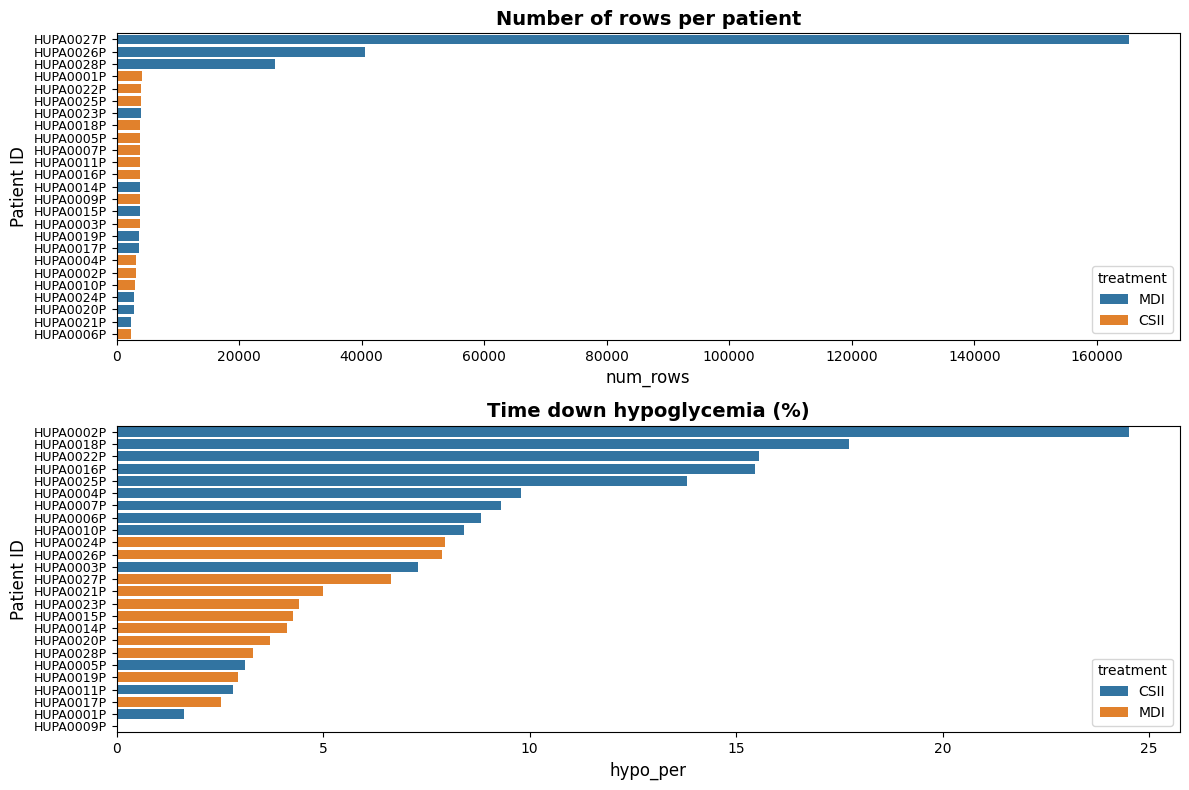

In [17]:
rows_per_patient(ids, patients, measures_patients, 'figures/data_analysis/amout_rows.png')

Let's plot each patient's glucose distribution 

In [18]:
def compare_box_plots(ids: list, patients: dict, route:str):
    _, axes = plt.subplots(nrows=len(ids), ncols=1, figsize=(10, 10))
    for i, id_ in enumerate(ids):
        df_i = patients[id_]
        ax_i = axes[i]

        sns.boxplot(
            data=df_i, 
            x='glucose', 
            ax=ax_i,
            color="white",
            boxprops=dict(edgecolor="blue", linewidth=1.5),
            medianprops=dict(color="red", linewidth=2),
            whiskerprops=dict(color="blue", linewidth=1.2),
            capprops=dict(color="blue", linewidth=1.2),
            flierprops=dict(marker='o', color='blue', markersize=3)
        )

        ax_i.set_ylabel(id_, rotation=0, fontsize=12, labelpad=40)
        ax_i.set_xlabel('')
    plt.xlabel('Glucose')
    plt.tight_layout()
    #plt.savefig(route)
    plt.show()

First 12 patients 

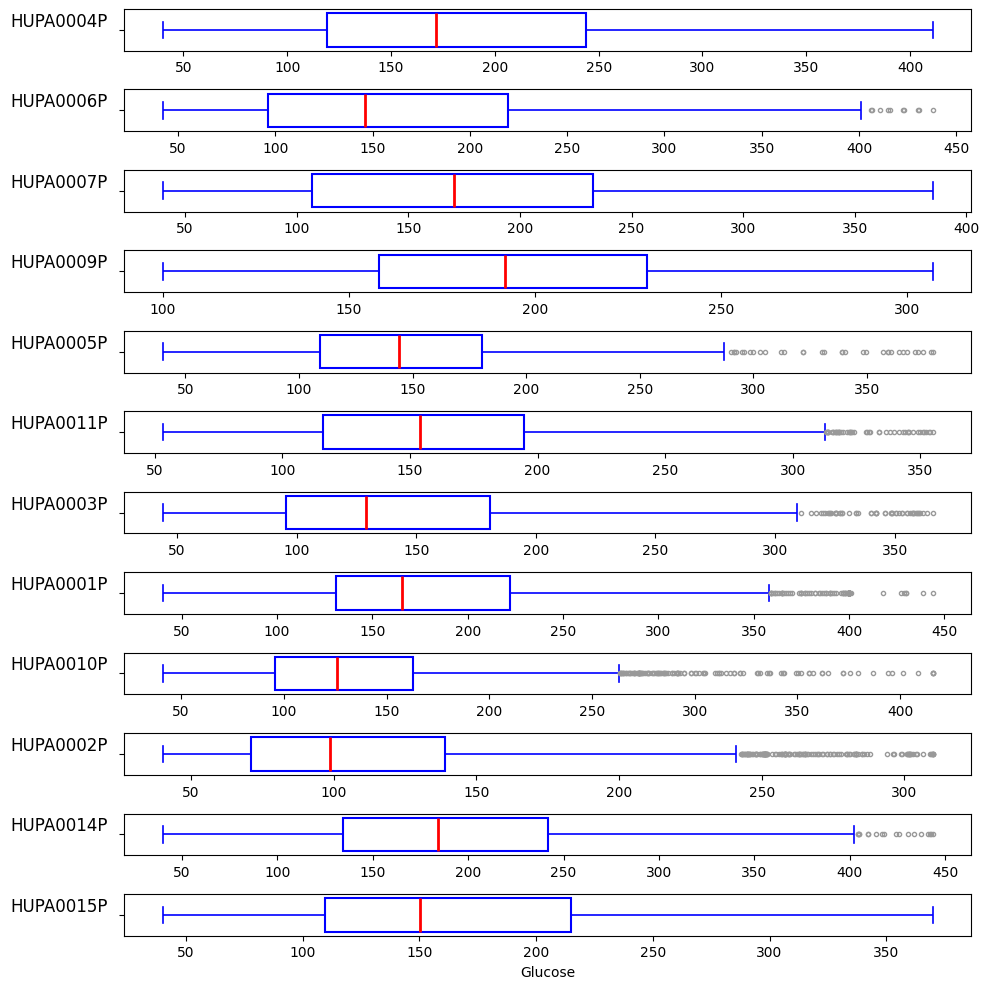

In [19]:
compare_box_plots(ids[:12], patients, 'figures/data_analysis/box_plots_glucose_1.png')

The other half of patients 

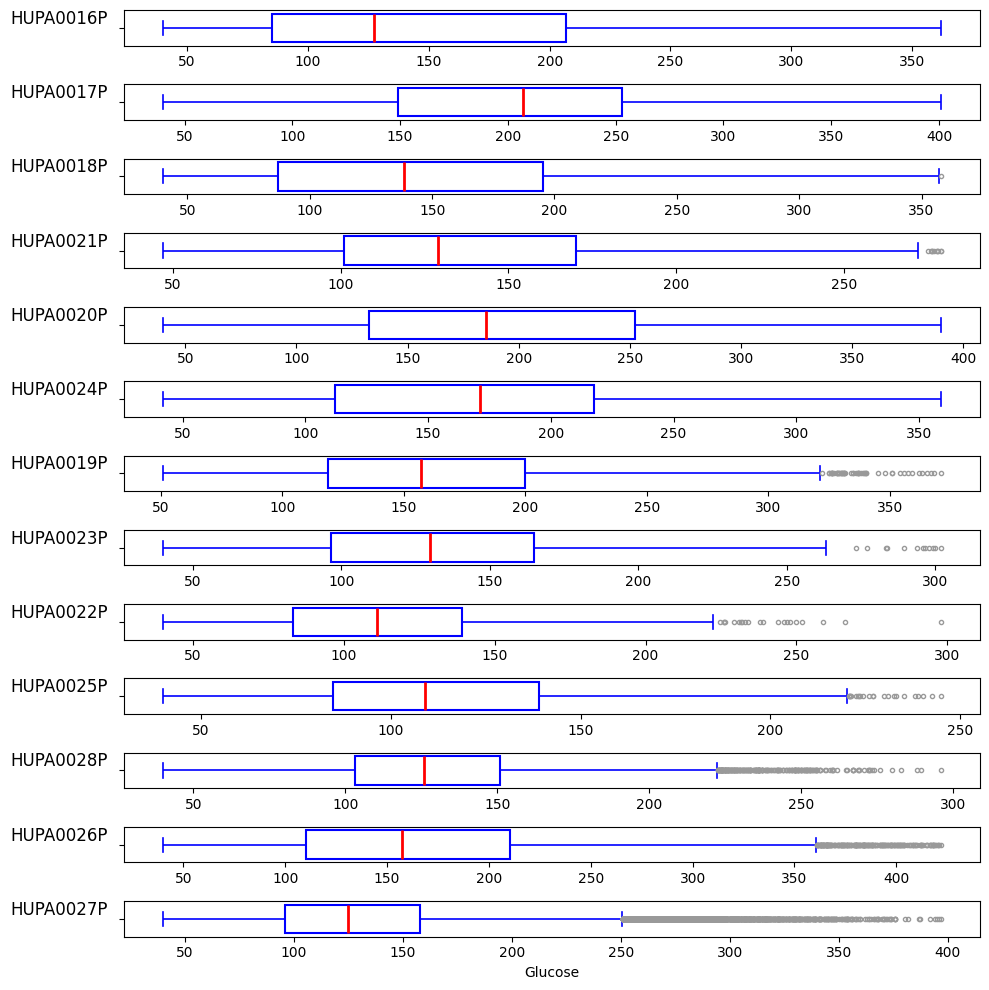

In [20]:
compare_box_plots(ids[12:], patients, 'figures/data_analysis/box_plots_glucose_2.png')

## Correlations 

### Simple correlations 

In [21]:
def glucose_correlations_by_patient(ids, patients, route_save_image):
    # Correlation with regard glucose for each patient
    corr_with_glucose = {
        id: patients[id].corr(numeric_only=True)['glucose'].drop(['glucose']) ## Since glucose is always equal to 1
        for id in ids
    }

    # Jut to plot in the desired order
    df_glucose_corr = pd.DataFrame(corr_with_glucose).T.fillna(0)


    plt.figure(figsize=(20, 9))
    sns.heatmap(
        df_glucose_corr, 
        annot=True, 
        cmap='RdBu_r',
        cbar_kws={'label': 'Correlation with glucose'}
    )
    plt.title("Correlation of each glucose patient against other variables", fontsize=16)
    plt.tight_layout()
    #plt.savefig(route_save_image)
    plt.show()


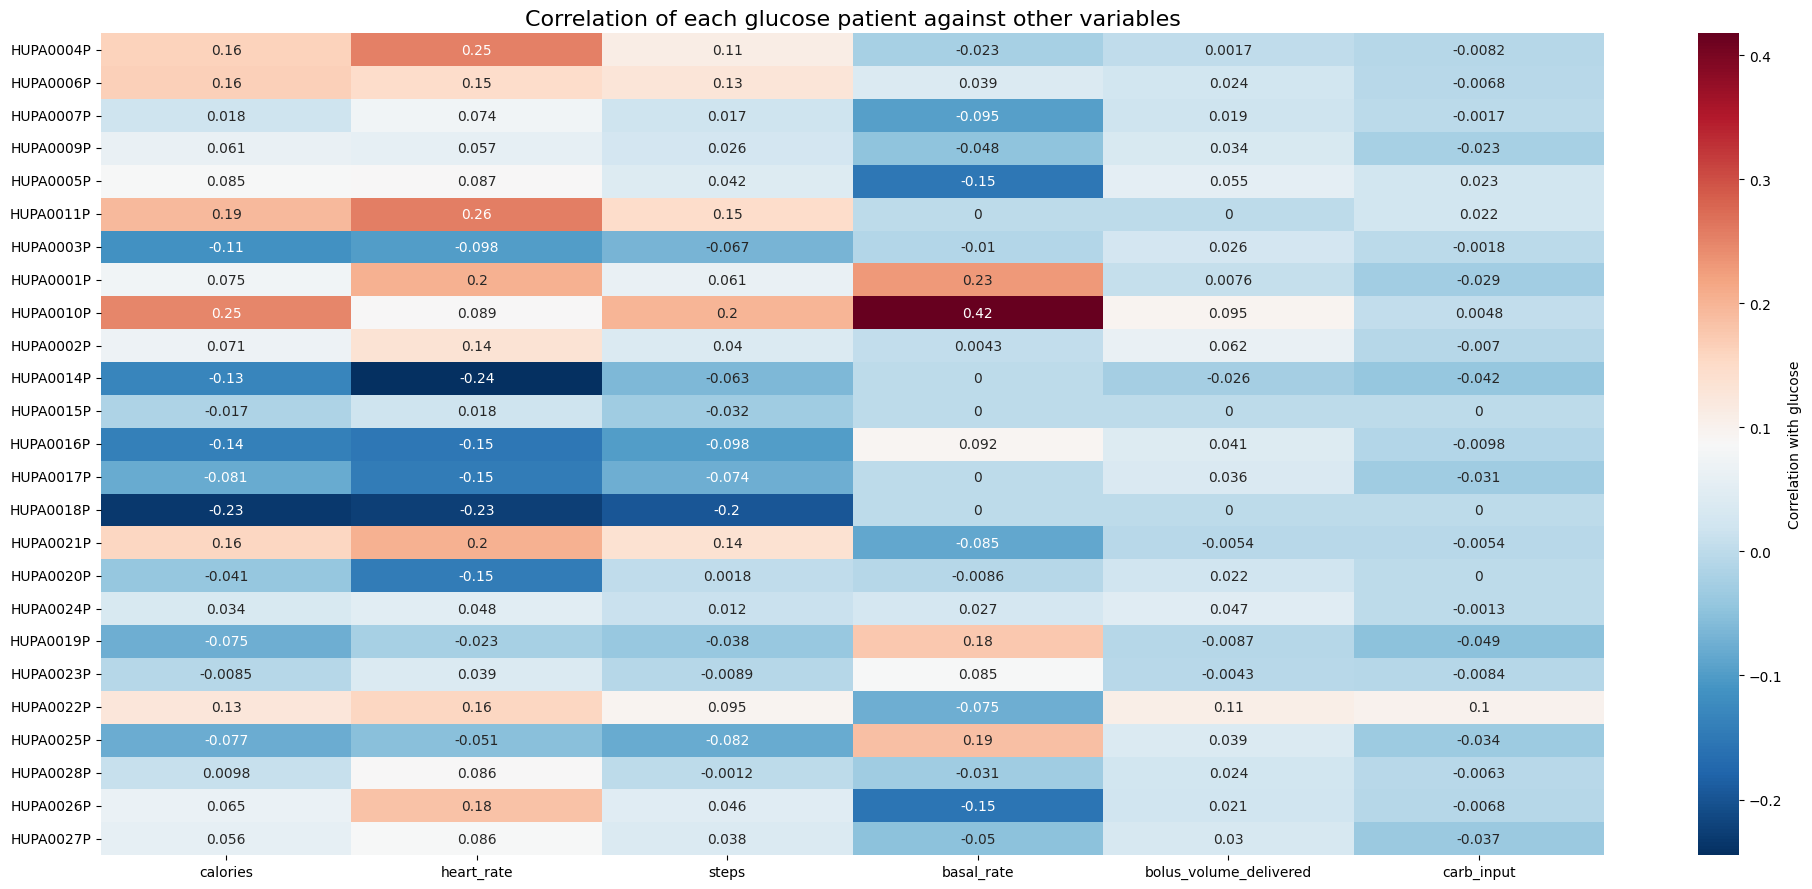

In [22]:
glucose_correlations_by_patient(ids, patients, 'figures/data_analysis/glucose_correlations.png')

### Cross correlations 

Since rapid-acting insulin takes about 15 minutes to lower blood sugar, we measure correlation between $\text{bolus\_volume\_delivered}_t$ and $\text{glucose}_{t+\tau}$


We start visualizing both variables. In addition, since each variable has a different scale we use Min Max scaler to compare both in same scale 

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
def plot_bolus_against_glucose(ids, patients):
    _, axes = plt.subplots(nrows=len(ids), ncols=1, figsize=(10, 50))
    for i, id in enumerate(ids):
        df_i = patients[id]
        ax_i = axes[i]
        time = df_i['time']
        glucose_i = df_i['glucose']
        bolus_i = df_i['bolus_volume_delivered']

        ## Normalize between 0 to 1 to get both variable at sames scales 
        scaler = MinMaxScaler()
        glucose_i = scaler.fit_transform(glucose_i.values.reshape(glucose_i.shape[0], 1))
        bolus_i = scaler.fit_transform(bolus_i.values.reshape(bolus_i.shape[0], 1))
        

        ## Plot it 
        ax_i.plot(time, glucose_i, label='glucose')
        ax_i.plot(time, bolus_i, label='rapid-acting insulin')
        ax_i.set(title=f'{id}', xlabel='time')
        ax_i.legend(loc='upper right')
    plt.tight_layout()


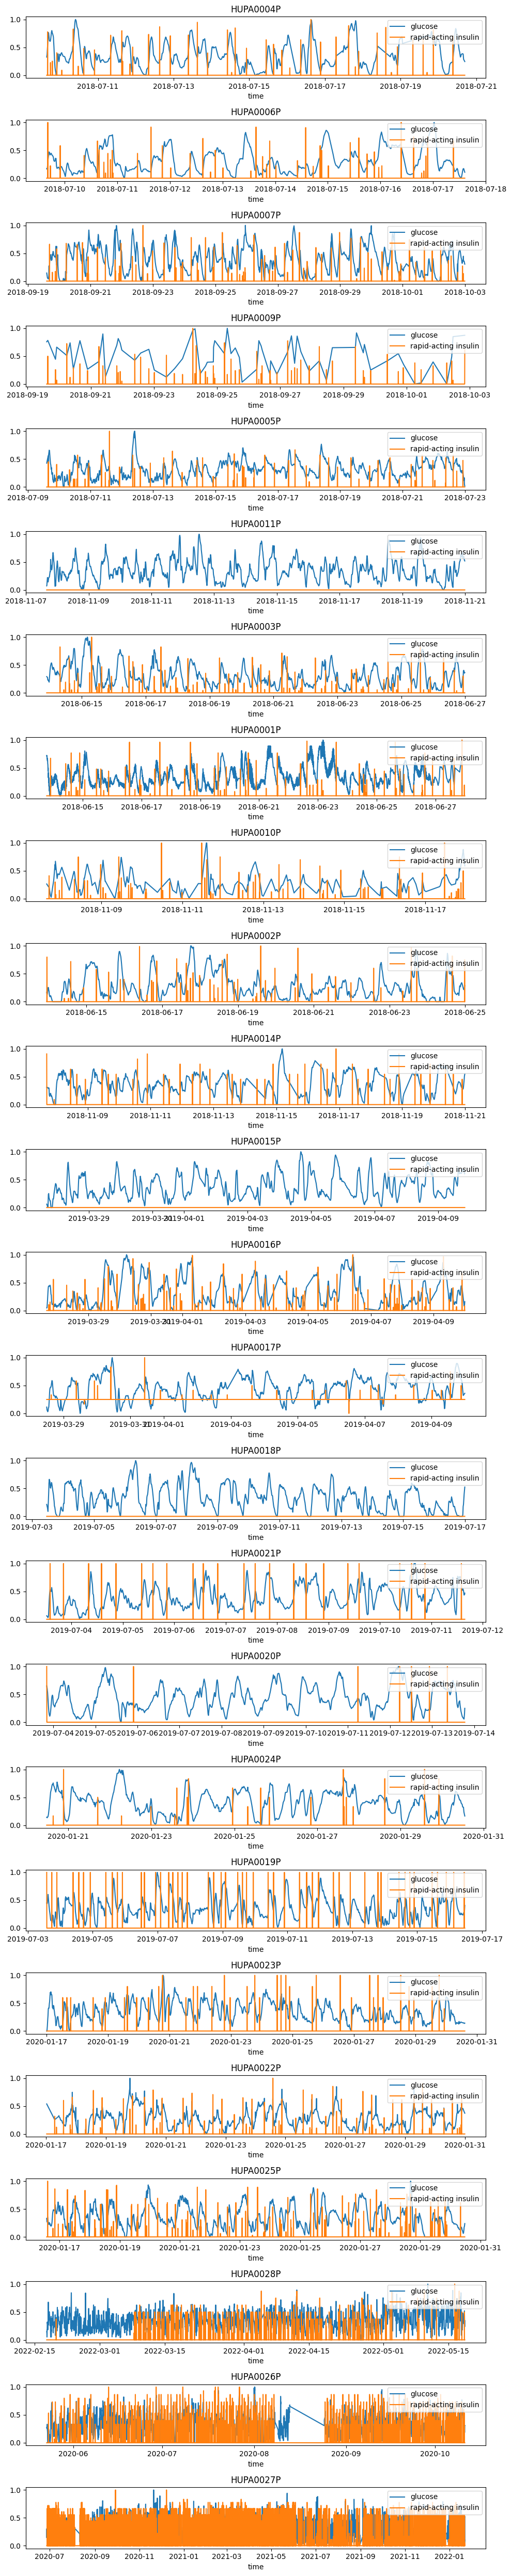

In [25]:
plot_bolus_against_glucose(ids, patients)

Now we measure cross correlation and rapid acting insulin

In [26]:
from statsmodels.tsa.stattools import ccf
from statsmodels.graphics.tsaplots import plot_ccf
import numpy as np 

In [27]:
def cross_correlation_patients(ids, patients):
    _, axes = plt.subplots(nrows=len(ids), ncols=1, figsize=(10, 50))
    for i, id in enumerate(ids):
        df_i = patients[id]
        ts1 = df_i['glucose']
        ts2 = df_i['bolus_volume_delivered']
        #correlations = ccf(ts1, ts2, nlags=20)
    
        ## Plot for all patients 
        ax_i = axes[i]
        plot_ccf(ts1, ts2, ax=ax_i, lags=20)
        ax_i.set(title=f'{id}', xlabel='lags')

    plt.tight_layout()
    #plt.savefig('figures/data_analysis/ccf_all.png')
    plt.show()


/home/arturo27/.local/lib/python3.13/site-packages/statsmodels/tsa/stattools.py:1179: RuntimeWarning: invalid value encountered in divide
  ret = cvf / (np.std(x) * np.std(y))


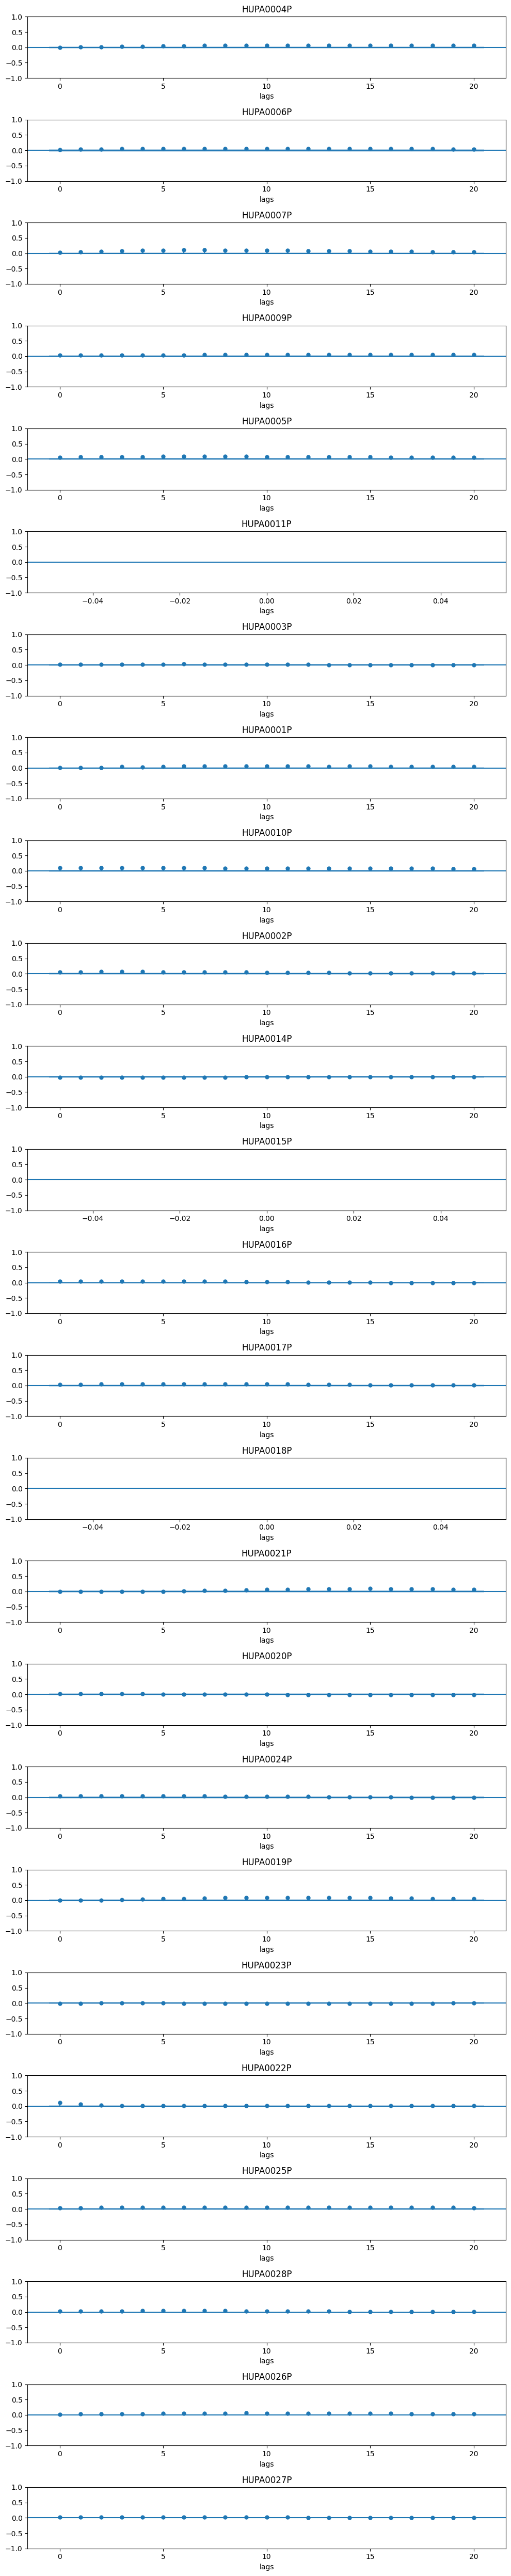

In [28]:
cross_correlation_patients(ids, patients)

## ACF 

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [30]:
def acf_patients(ids, patients):
    _, axes = plt.subplots(nrows=len(ids), ncols=1, figsize=(10, 50))
    for i, id in enumerate(ids):
        df_i = patients[id]
        ts = df_i['glucose']
      
        ## Plot it
        ax_i = axes[i]
        plot_acf(ts, ax=ax_i, lags=100)
        ax_i.set(title=f'{id}', xlabel='lags')
    plt.tight_layout()
    plt.show()


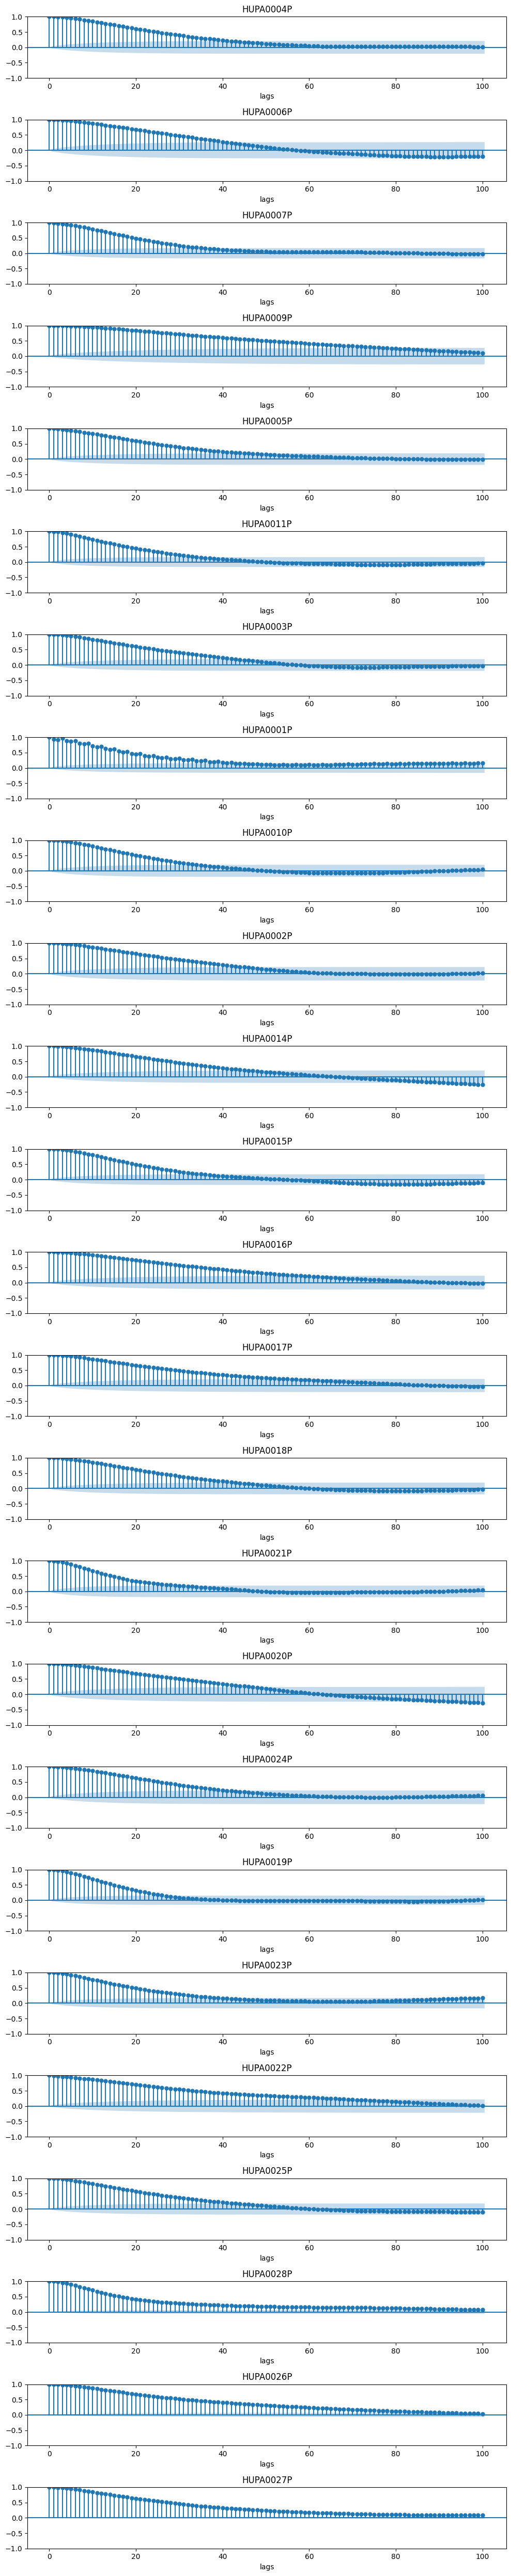

In [31]:
acf_patients(ids, patients)

## PACF

In [32]:
def pacf_patients(ids, patients):
    _, axes = plt.subplots(nrows=len(ids), ncols=1, figsize=(10, 50))
    for i, id in enumerate(ids):
        df_i = patients[id]
        ts = df_i['glucose']
      
        ## Plot it
        ax_i = axes[i]
        plot_pacf(ts, ax=ax_i, lags=50)
        ax_i.set(title=f'{id}', xlabel='lags')
    plt.tight_layout()
    #plt.savefig('figures/data_analysis/pacf_all.png')
    plt.show()


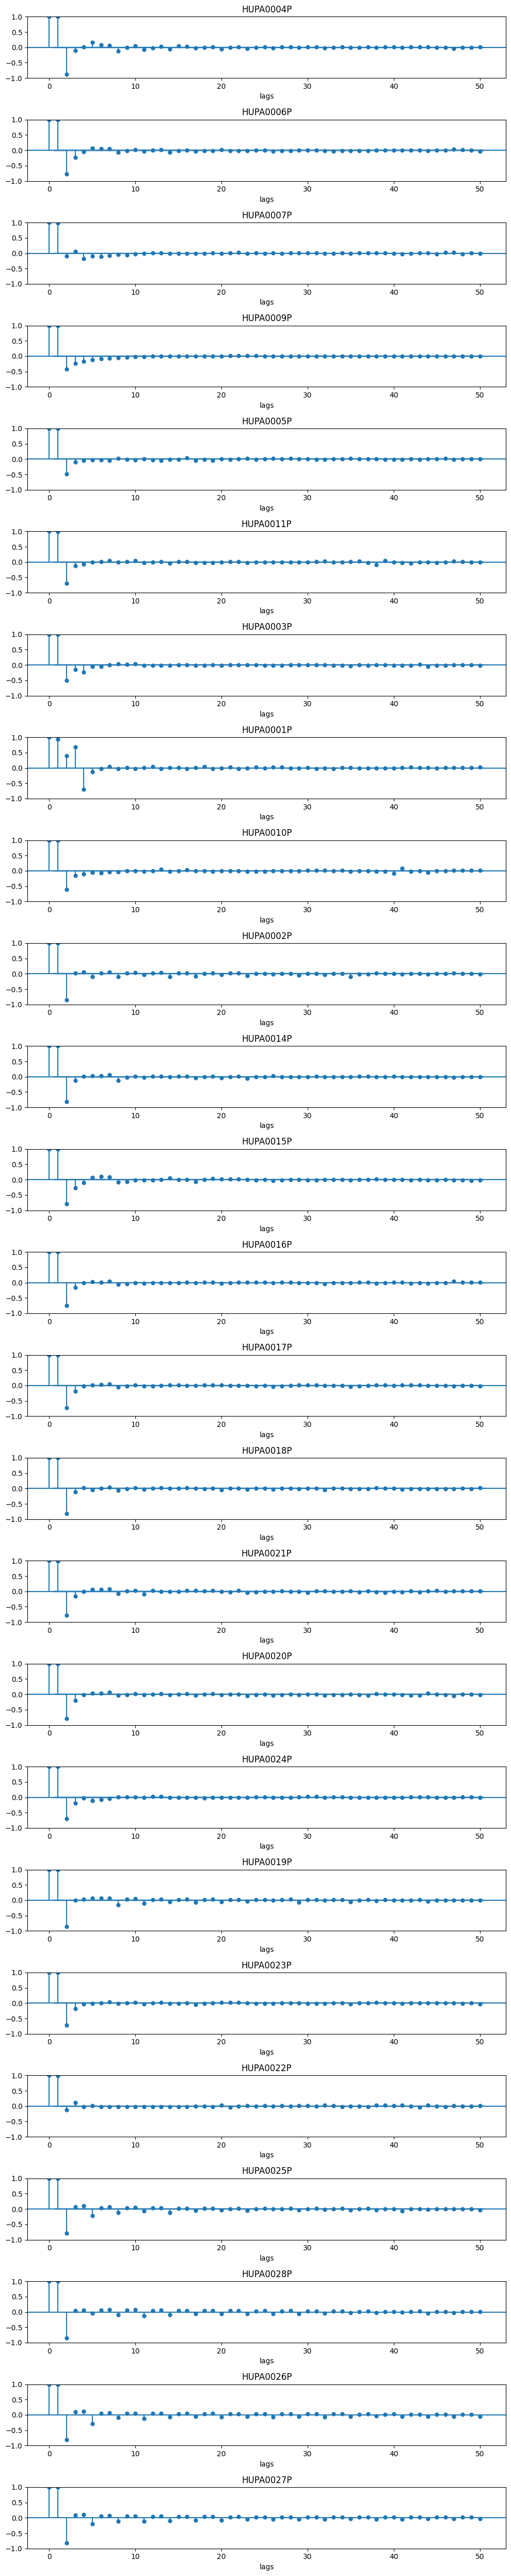

In [33]:
pacf_patients(ids, patients)

## KPSS and Dickey-Fuller test

In this section, we perform ADF test in order to show statistical evidence to assert stationarity 

In [54]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from tabulate import tabulate
from statsmodels.tsa.statespace.tools import diff

In [38]:
def test_adf(ids, patients):
    table = []
    for id in ids:
        df_i = patients[id]
        time_series_i = df_i['glucose']
        adf_result = adfuller(time_series_i)
        result = 'Estacionaria' if adf_result[1] < 0.05 else 'No estacionaria'
        row_to_tabulate = [id, adf_result[1], result]
        table.append(row_to_tabulate)

    print(tabulate(table, headers=['ID_patient', 'p_value', 'Result'], tablefmt="grid"))

In [39]:
def test_kpss(ids, patients):
    table = []
    for id in ids:
        df_i = patients[id]
        glucose_i = df_i['glucose']
        kpss_result = kpss(glucose_i)
        result = 'No estacionaria' if kpss_result[1] < 0.05 else 'Estacionaria'
        row_to_tabulate = [id, kpss_result[1], result]
        table.append(row_to_tabulate)

    print(tabulate(table, headers=['ID_patient', 'p_value', 'Result'], tablefmt="grid"))


As we could see in our previous results KPPS and AFD are different, so we apply the differencing operation

In [58]:
def compare_kpss_adf(ids, patients, num_diff):
    table = []
    for id in ids:
        if num_diff > 0:
            for _ in range(num_diff):
                glucose_i = patients[id]['glucose']
                glucose_i = diff(glucose_i, k_diff=1)
        else:
            glucose_i = patients[id]['glucose']
        kpss_result = 'Estacionaria' if kpss(glucose_i)[1] > 0.05 else 'No estacionaria'
        adf_result = 'No estacionaria' if adfuller(glucose_i)[1] > 0.05 else 'Estacionaria'
        row_to_tabulate = [id, kpss_result, adf_result]
        table.append(row_to_tabulate)
    print(tabulate(table, headers=['ID_patient', 'KPPS', 'ADF'], tablefmt="grid"))

In [ ]:
#test_adf(ids, patients) ## Saved at results/no_diff_results/adf_test_result.txt

In [ ]:
#test_kpss(ids, patients) ## Saved at results/no_diff_results/kpss_result.txt

In [ ]:
#compare_kpss_adf(ids, patients) ## Saved at results/no_diff_results/no_diff_comp.txt

It is always better to apply both the tests, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- Case 1: Both tests conclude that the series is not stationary - The series is not stationary
- Case 2: Both tests conclude that the series is stationary - The series is stationary
- Case 3: KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.
- Case 4: KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

In [ ]:
#compare_kpss_adf(ids, patients, num_diff=1) ## Saved at results results/1_diff_results.txt

## Conclusions and final report 

This notebook showed an analysis of every single patient form out 25 patients dataset covered topic include:
- ACF for every patient 
- PACF 
- ADF AND KPSS to test stacionarity
<br>
For the last point, we have found that with any differencing process the result between KPPS and ADF are different, but at the first diff both test share stacionarity as result for every patient 